<a href="https://www.kaggle.com/code/risakashiwabara/eda-heatmap-barplot?scriptVersionId=209521050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

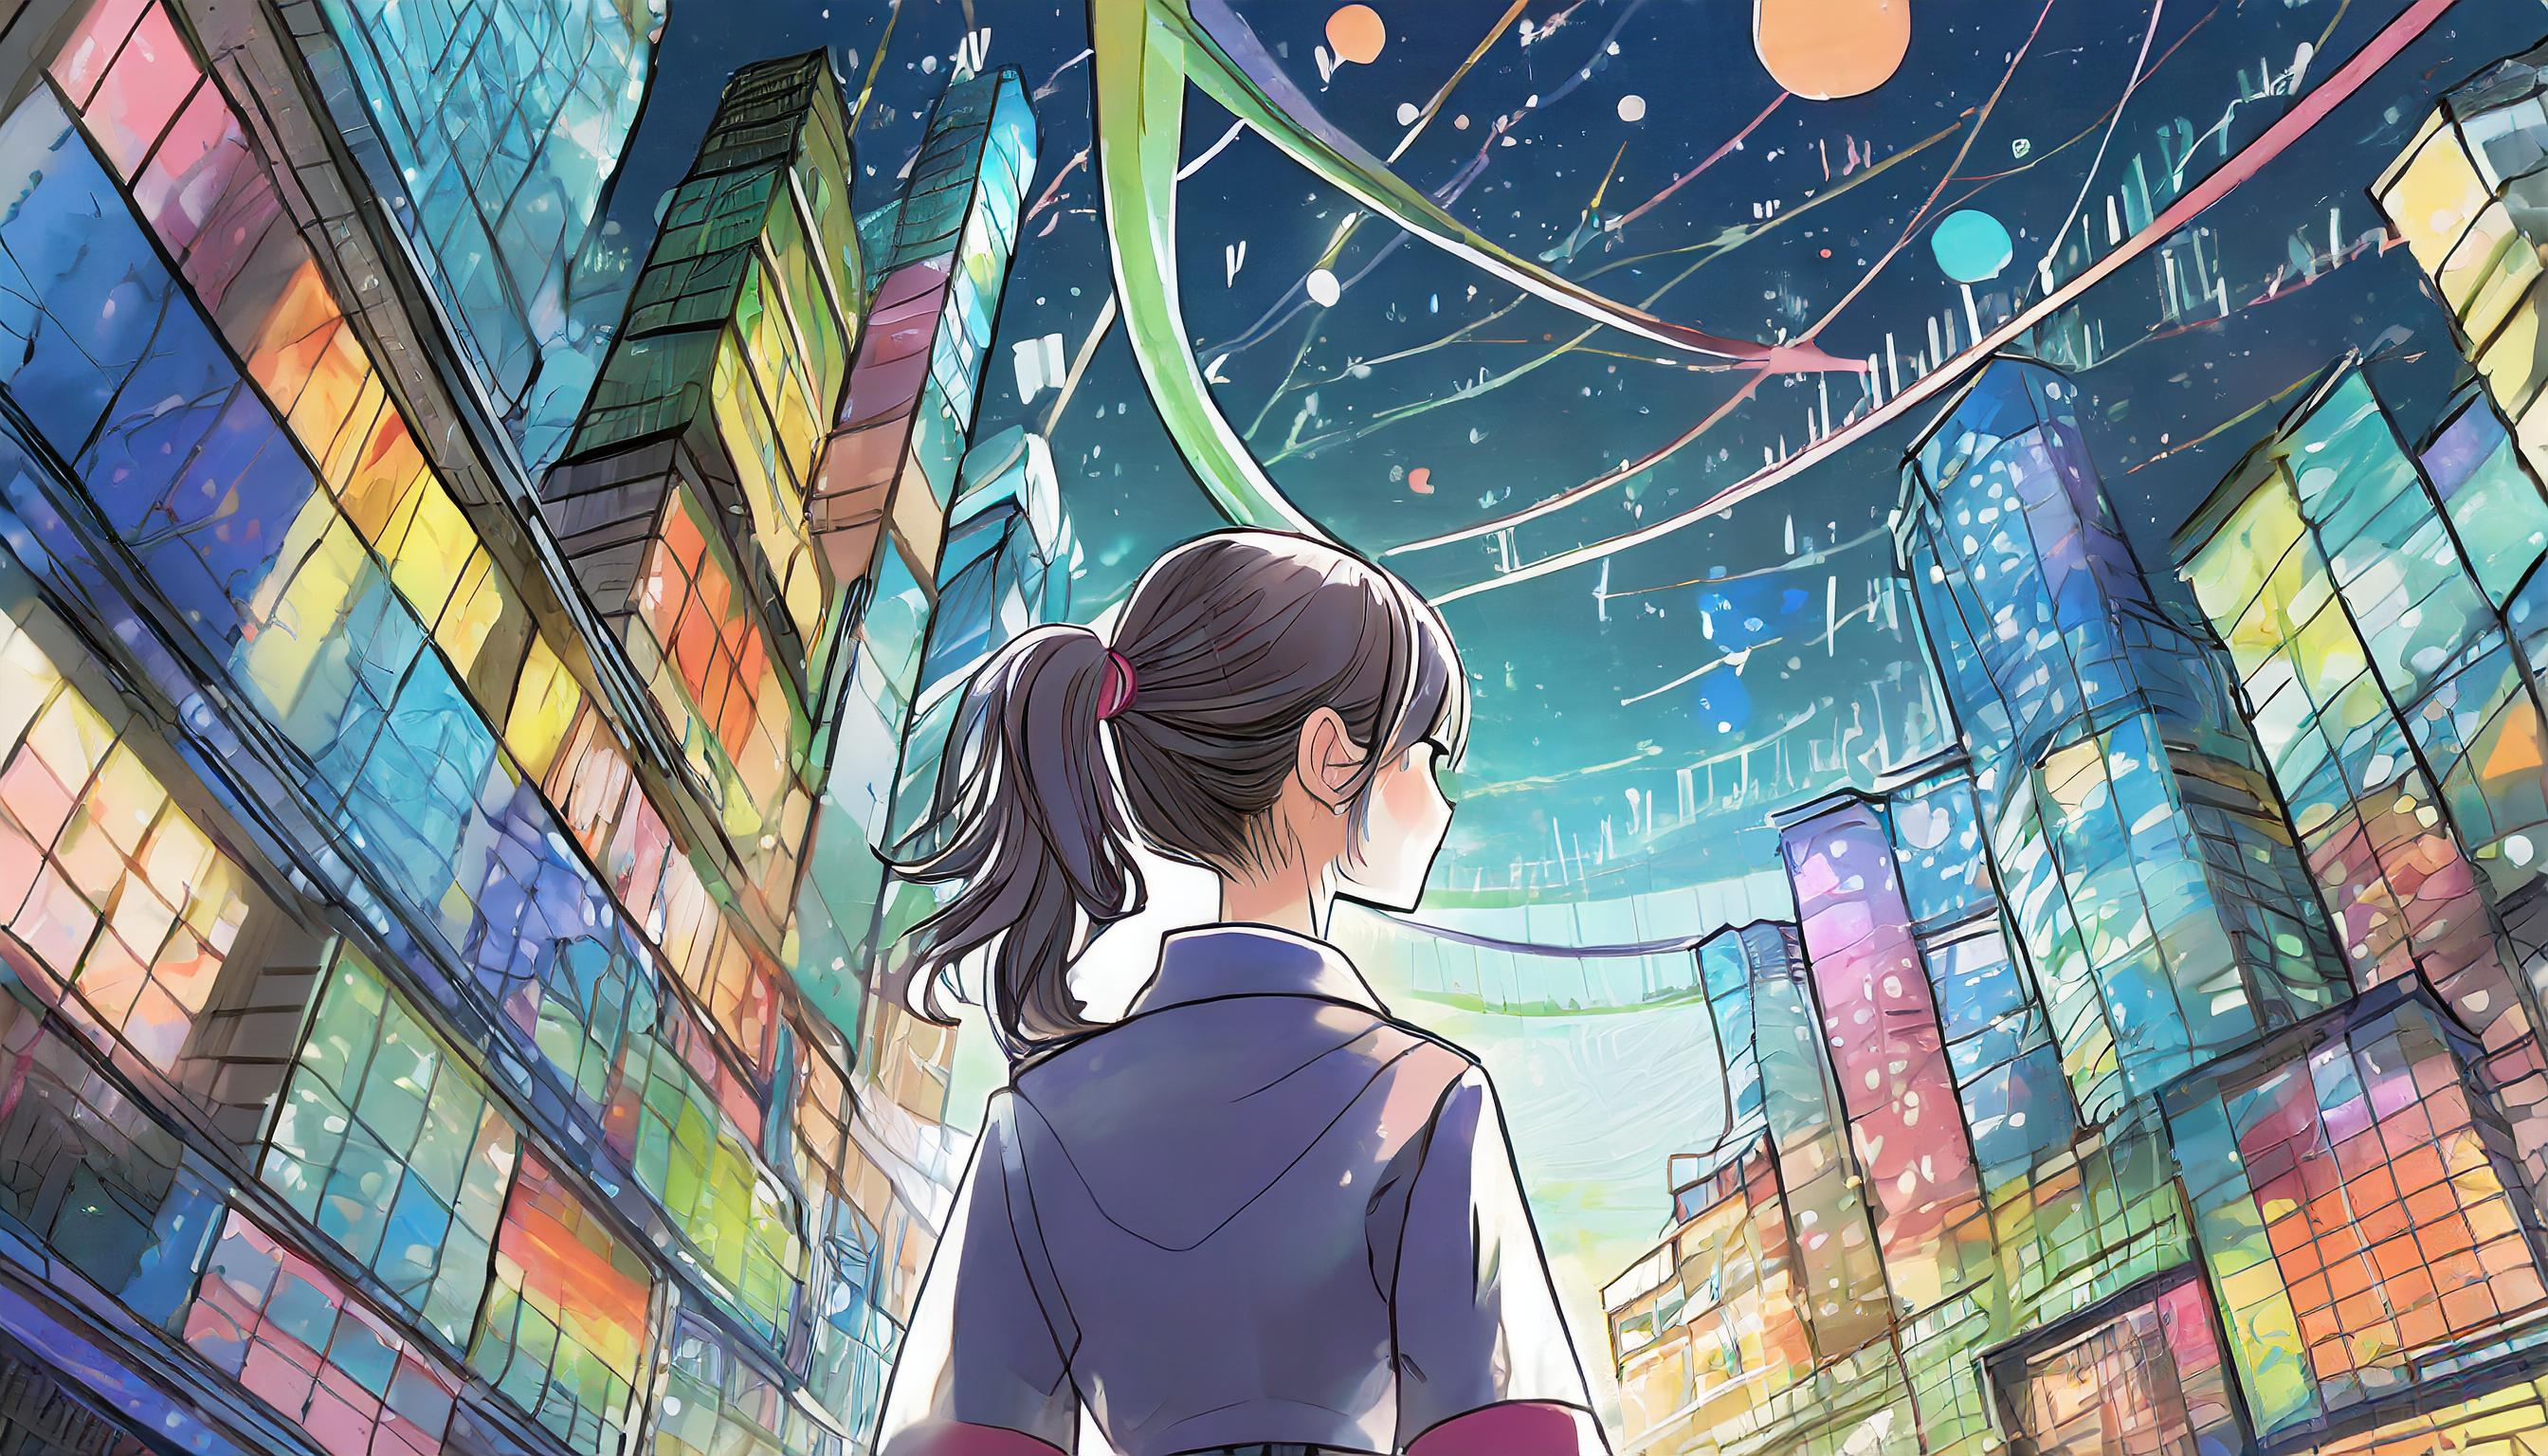

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/BQ8YQ7LX/publicdomainq-0072055.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/BQ8YQ7LX/publicdomainq-0072055.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">heatmap </p>

In [2]:
df_data = pd.read_csv('/kaggle/input/japandairy-product-consumption-in-japan/milk and milk production.csv', index_col=0)
df_reset = df_data.reset_index('year')
df_index = df_reset [1:38]
df_columns = df_index.iloc[:,0:7]
df = df_columns.dropna(how='all')
df.head(2)

,year,Raw milk production,milk,Processed milk and ingredient-controlled milk,Milk beverage production,Fermented milk production,Lactobacillus Beverage Production
1,1986.0,"7,456,940","3,675,575","585,478","711,441","207,194","173,237"
2,1987.0,"7,334,943","3,857,606","577,862","730,262","225,054","174,169"


In [3]:
# Convert 'year' to integer using .loc to avoid SettingWithCopyWarning
df.loc[:, 'year'] = df['year'].astype(int)

# Remove commas and convert numerical columns to integers using .loc
columns_to_clean = [
    'Raw milk production', 
    'milk', 
    'Processed milk and ingredient-controlled milk', 
    'Milk beverage production', 
    'Fermented milk production', 
    'Lactobacillus Beverage Production'
]

for col in columns_to_clean:
    df.loc[:, col] = df[col].str.replace(',', '').astype(int)

# Display the cleaned DataFrame
df.head(3)

,year,Raw milk production,milk,Processed milk and ingredient-controlled milk,Milk beverage production,Fermented milk production,Lactobacillus Beverage Production
1,1986.0,7456940,3675575,585478,711441,207194,173237
2,1987.0,7334943,3857606,577862,730262,225054,174169
3,1988.0,7606774,4043891,612168,745611,262396,197315


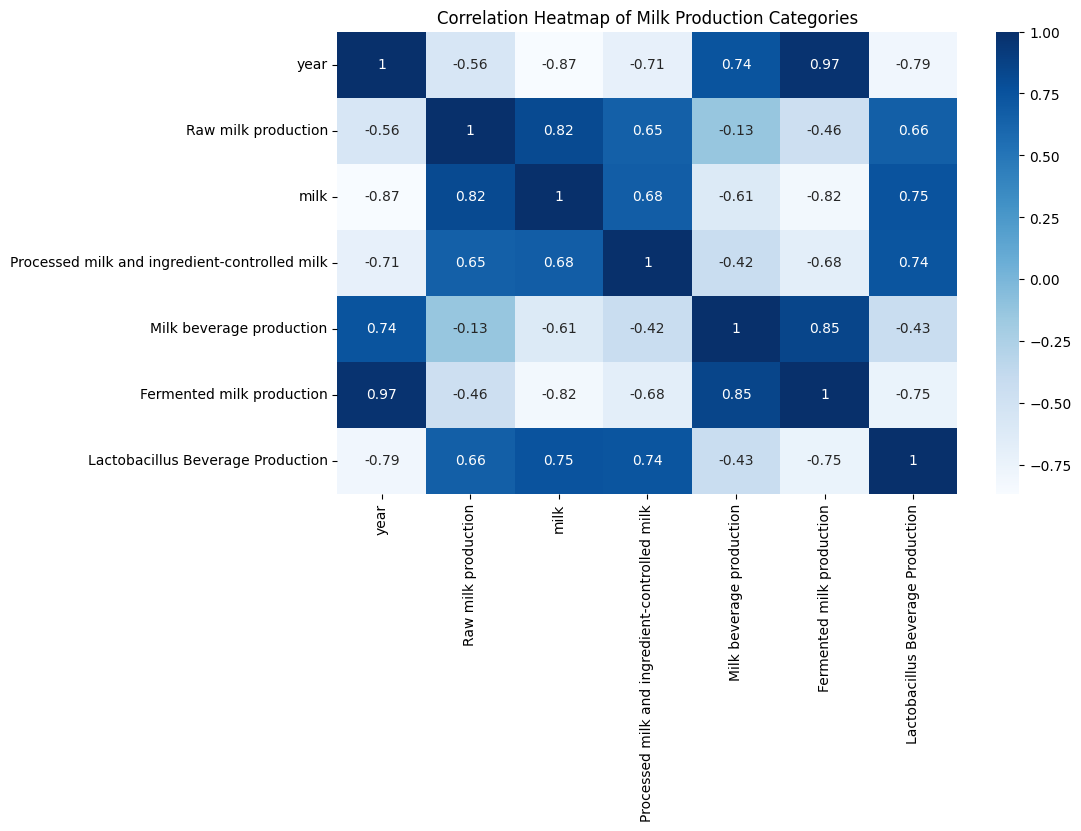

In [4]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Milk Production Categories')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/BQ8YQ7LX/publicdomainq-0072055.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">bar graph-len </p>

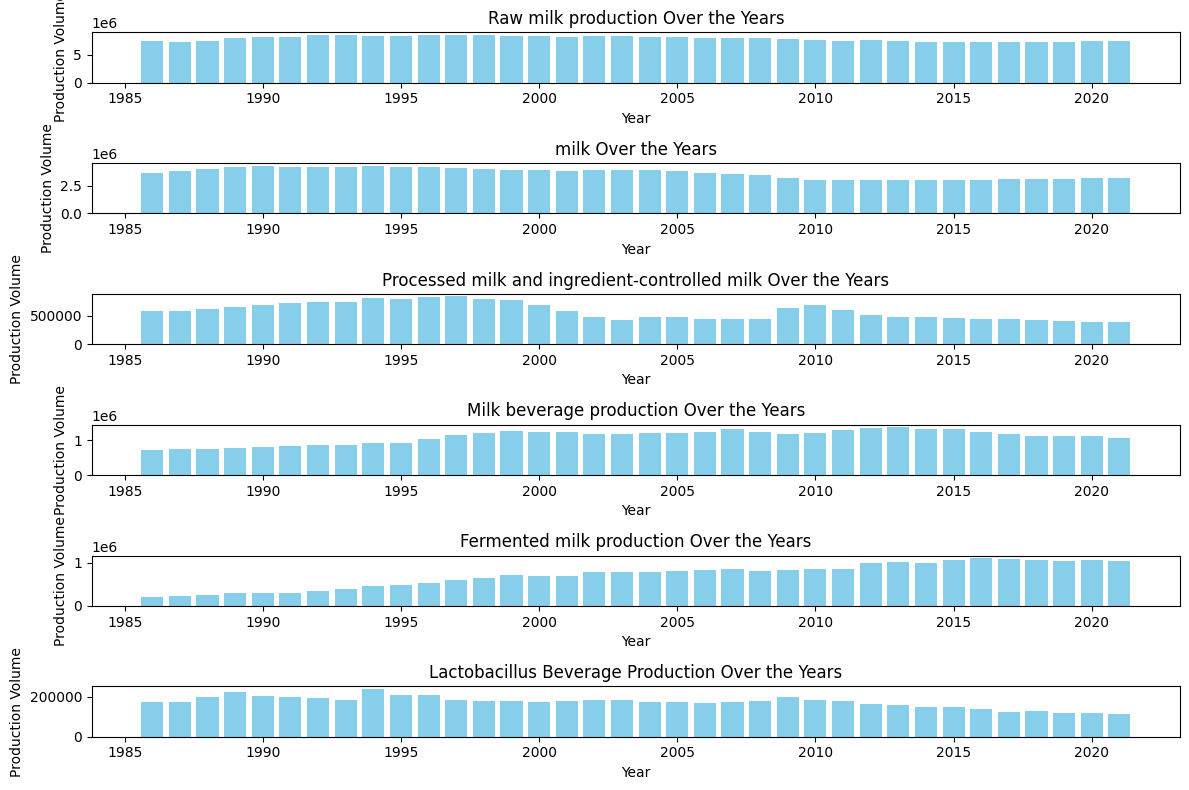

In [5]:
# Set the index to 'year' for easier plotting
df.set_index('year', inplace=True)

# Plotting each category in a separate subplot
categories = ['Raw milk production', 'milk', 'Processed milk and ingredient-controlled milk', 
              'Milk beverage production', 'Fermented milk production', 'Lactobacillus Beverage Production']

plt.figure(figsize=(12, 8))

# Create a bar plot for each category
for i, category in enumerate(categories, start=1):
    plt.subplot(len(categories), 1, i)  # Create a new subplot for each category
    plt.bar(df.index, df[category], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Production Volume')
    plt.title(f'{category} Over the Years')

plt.tight_layout()  # Adjust the layout
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/BQ8YQ7LX/publicdomainq-0072055.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">bar graph </p>

In [6]:
df = pd.read_csv('/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv')

# Calculate total matches played by summing wins, draws, and losses
df['total_matches'] = df['wins'] + df['draws'] + df['losses']
df['win_percentage'] = (df['wins'] / df['total_matches']) * 100
df['draw_percentage'] = (df['draws'] / df['total_matches']) * 100
df['loss_percentage'] = (df['losses'] / df['total_matches']) * 100

df[['team', 'total_matches', 'win_percentage', 'draw_percentage', 'loss_percentage']].head(5)

,team,total_matches,win_percentage,draw_percentage,loss_percentage
0,Manchester City,76,72.368421,15.789474,11.842105
1,Liverpool,76,57.894737,25.000000,17.105263
2,Arsenal,76,60.526316,15.789474,23.684211
3,Manchester United,76,51.315789,22.368421,26.315789
4,Chelsea,76,48.684211,25.000000,26.315789


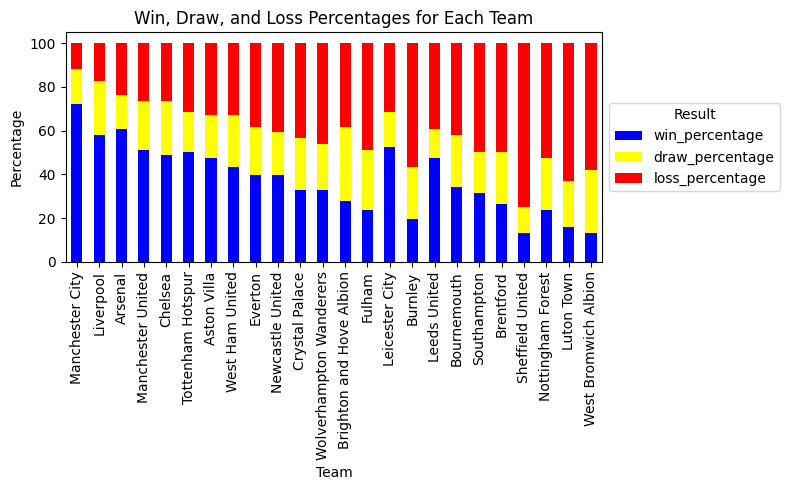

In [7]:
df.set_index('team')[['win_percentage', 'draw_percentage', 'loss_percentage']].plot(
    kind='bar', stacked=True, figsize=(8, 5), color=['Blue', 'yellow', 'red'])

plt.title('Win, Draw, and Loss Percentages for Each Team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Result")  
plt.tight_layout()  
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/BQ8YQ7LX/publicdomainq-0072055.jpg);font-family:Hiragino Sans;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">bar graph </p>

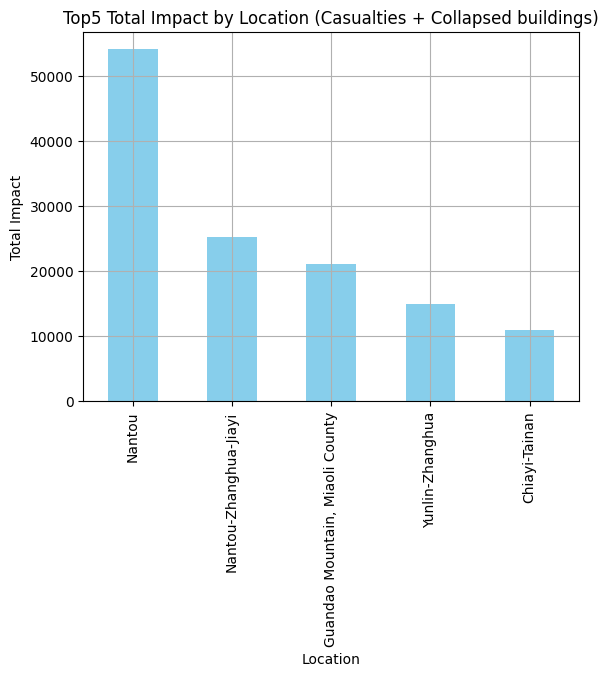

In [8]:
df_disastrous = pd.read_csv('/kaggle/input/taiwan-earthquake-dataset/disastrous earthquake.csv')
df_disastrous['Casualties'] = pd.to_numeric(df_disastrous['Casualties'], errors='coerce')
df_disastrous['Collapsed building'] = pd.to_numeric(df_disastrous['Collapsed building'], errors='coerce')

df_disastrous.fillna(0, inplace=True)
df_disastrous['Total Impact'] = df_disastrous['Casualties'] + df_disastrous['Collapsed building']

impact_by_location = df_disastrous.groupby('Location')['Total Impact'].sum().sort_values(ascending=False)
impact_five = impact_by_location[:5]


impact_five.plot(kind='bar', color='skyblue')

plt.title('Top5 Total Impact by Location (Casualties + Collapsed buildings)')
plt.xlabel('Location')
plt.ylabel('Total Impact')
plt.grid(True)
plt.show()